In [1]:
import pandas as pd
import numpy as np
import os
from numpy import random
import scipy 
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm ,t
import seaborn as sns
import pylab
from pylab import legend,plot,show,title,xlabel,ylabel
from random import choice
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion  as ssp
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson as psn
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
os.chdir(r"D:\R Programing")

In [2]:
df = pd.read_csv('Leads.csv')

In [3]:
df.replace('Select',np.nan,inplace=True)

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.shape

(9240, 37)

In [6]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
null = df.isnull().mean()

In [8]:
null

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [9]:
df = df.drop(columns=['How did you hear about X Education','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','Lead Profile'])

In [10]:
df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [11]:
df['Lead Source'] = df['Lead Source'].fillna('Google')

In [12]:
df['Lead Source'].isna().sum()

0

In [13]:
df['TotalVisits'].mean()

3.445237833681204

In [14]:
df['TotalVisits'].median()

3.0

In [15]:
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())

In [16]:
df['Page Views Per Visit'].mean()

2.3628199494672084

In [17]:
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [18]:
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [19]:
df.dropna(subset=['Last Activity'],inplace=True)

In [20]:
df['Country'] = df['Country'].fillna('Unknown')

In [21]:
df["Country"].isna().sum()

0

In [22]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   3326
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [23]:
df['City'] = df['City'].fillna('Unknown')

In [24]:
df.City.value_counts()

City
Unknown                        3618
Mumbai                         3186
Thane & Outskirts               749
Other Cities                    680
Other Cities of Maharashtra     451
Other Metro Cities              379
Tier II Cities                   74
Name: count, dtype: int64

In [25]:
occupation_distribution=df['Specialization'].value_counts(normalize=True)
occupation_distribution

Specialization
Finance Management                   0.166236
Human Resource Management            0.144381
Marketing Management                 0.141972
Operations Management                0.086044
Business Administration              0.069179
IT Projects Management               0.062984
Supply Chain Management              0.059542
Banking, Investment And Insurance    0.057649
Travel and Tourism                   0.034762
Media and Advertising                0.034762
International Business               0.030632
Healthcare Management                0.027018
E-COMMERCE                           0.019274
Hospitality Management               0.019102
Retail Management                    0.017209
Rural and Agribusiness               0.012562
E-Business                           0.009809
Services Excellence                  0.006883
Name: proportion, dtype: float64

In [26]:
missing_count=df['Specialization'].isnull().sum()

In [27]:
# It is used generates random samples from the Type of Occupation 
random_fill = np.random.choice(
    occupation_distribution.index, 
    size=missing_count, 
    p=occupation_distribution.values
)

In [28]:
occupation_distribution

Specialization
Finance Management                   0.166236
Human Resource Management            0.144381
Marketing Management                 0.141972
Operations Management                0.086044
Business Administration              0.069179
IT Projects Management               0.062984
Supply Chain Management              0.059542
Banking, Investment And Insurance    0.057649
Travel and Tourism                   0.034762
Media and Advertising                0.034762
International Business               0.030632
Healthcare Management                0.027018
E-COMMERCE                           0.019274
Hospitality Management               0.019102
Retail Management                    0.017209
Rural and Agribusiness               0.012562
E-Business                           0.009809
Services Excellence                  0.006883
Name: proportion, dtype: float64

In [29]:
missing_count

3326

In [30]:
df['Specialization'].isna().sum()

3326

In [31]:
random_fill

array(['Marketing Management', 'Finance Management',
       'Supply Chain Management', ..., 'Marketing Management',
       'Marketing Management', 'Finance Management'], dtype=object)

In [32]:
df.loc[df['Specialization'].isnull(), 'Specialization'] = random_fill

In [33]:
df['Specialization'].isna().sum()

0

In [34]:
occupation_distribution

Specialization
Finance Management                   0.166236
Human Resource Management            0.144381
Marketing Management                 0.141972
Operations Management                0.086044
Business Administration              0.069179
IT Projects Management               0.062984
Supply Chain Management              0.059542
Banking, Investment And Insurance    0.057649
Travel and Tourism                   0.034762
Media and Advertising                0.034762
International Business               0.030632
Healthcare Management                0.027018
E-COMMERCE                           0.019274
Hospitality Management               0.019102
Retail Management                    0.017209
Rural and Agribusiness               0.012562
E-Business                           0.009809
Services Excellence                  0.006883
Name: proportion, dtype: float64

In [35]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5523
Working Professional     685
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

In [36]:
df['What is your current occupation'].fillna('Unemployed',inplace=True)

C:\Users\viraj narayan shirke\AppData\Local\Temp\ipykernel_2744\2091382830.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['What is your current occupation'].fillna('Unemployed',inplace=True)


In [37]:
df['What is your current occupation'].isna().sum()

0

In [38]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6426
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

In [39]:
df['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

C:\Users\viraj narayan shirke\AppData\Local\Temp\ipykernel_2744\3597985248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)


In [40]:
df['What matters most to you in choosing a course'].isnull().sum()

0

In [41]:
df['Tags'].value_counts(normalize=True)

Tags
Will revert after reading the email                  0.353185
Ringing                                              0.205593
Interested in other courses                          0.087865
Already a student                                    0.080269
Closed by Horizzon                                   0.053685
switched off                                         0.041429
Busy                                                 0.031935
Lost to EINS                                         0.029864
Not doing further education                          0.025030
Interested  in full time MBA                         0.020024
Graduation in progress                               0.019161
invalid number                                       0.014328
Diploma holder (Not Eligible)                        0.010875
wrong number given                                   0.008113
opp hangup                                           0.005697
number not provided                                  0.004488
in 

In [42]:
df['Tags'].value_counts()

Tags
Will revert after reading the email                  2046
Ringing                                              1191
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    311
switched off                                          240
Busy                                                  185
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to O

In [43]:
df['Tags'].fillna('Unknown',inplace=True)

C:\Users\viraj narayan shirke\AppData\Local\Temp\ipykernel_2744\3813665123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tags'].fillna('Unknown',inplace=True)


In [44]:
df['Tags'].isna().sum()

0

<Axes: >

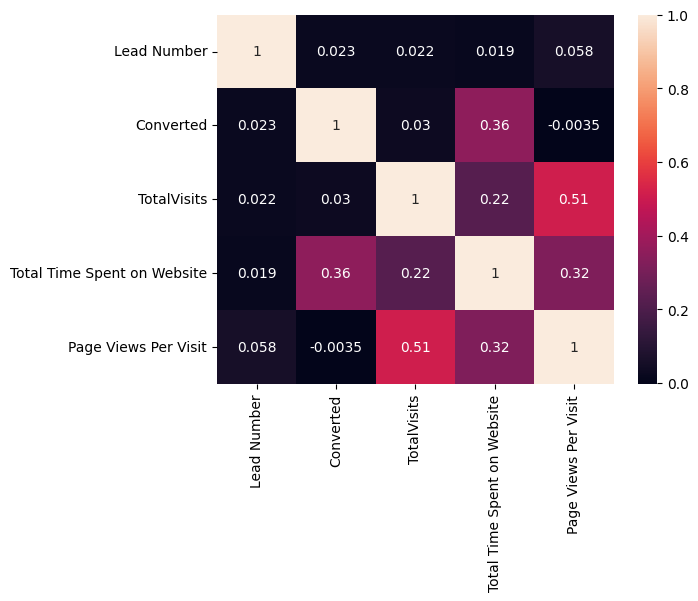

In [45]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [46]:
pd.set_option('display.max_columns',None)

In [47]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Marketing Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Unknown,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Unknown,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Supply Chain Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


## TotalVisits --> Too checks TotalVisits as the influence on Response variable Converted 

In [58]:
mod1 = ols('Converted ~ TotalVisits' ,data=df).fit()
tb1 = sm.stats.anova_lm(mod1)

In [59]:
print(tb1)

                 df       sum_sq   mean_sq         F    PR(>F)
TotalVisits     1.0     1.965346  1.965346  8.340309  0.003887
Residual     9135.0  2152.610554  0.235644       NaN       NaN


## Country --> Too checks Country as the influence on Response variable Converted 

In [63]:
mod1 = ols('Converted ~ Country' ,data=df).fit()
tb1 = sm.stats.anova_lm(mod1)

In [64]:
print(tb1)

              df       sum_sq   mean_sq         F    PR(>F)
Country     38.0    14.029327  0.369193  1.569186  0.014259
Residual  9098.0  2140.546573  0.235277       NaN       NaN


## City --> Too checks City as the influence on Response variable Converted 

In [65]:
mod1 = ols('Converted ~ City' ,data=df).fit()
tb1 = sm.stats.anova_lm(mod1)

In [66]:
print(tb1)

              df       sum_sq   mean_sq          F        PR(>F)
City         6.0    14.946787  2.491131  10.629893  8.440379e-12
Residual  9130.0  2139.629113  0.234351        NaN           NaN


## Specialization --> Too checks Specialization as the influence on Response variable Converted 

In [74]:
mod1 = ols('Converted ~ Specialization' ,data=df).fit()
tb1 = sm.stats.anova_lm(mod1)

In [75]:
print(tb1)

                    df       sum_sq   mean_sq         F    PR(>F)
Specialization    17.0     7.555766  0.444457  1.887733  0.014786
Residual        9119.0  2147.020134  0.235445       NaN       NaN


## Tags --> Too checks Tags as the influence on Response variable Converted 

In [76]:
mod1 = ols('Converted ~ Tags' ,data=df).fit()
tb1 = sm.stats.anova_lm(mod1)

In [77]:
print(tb1)

              df       sum_sq    mean_sq           F  PR(>F)
Tags        26.0  1345.733428  51.758978  582.961832     0.0
Residual  9110.0   808.842473   0.088786         NaN     NaN
